<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Балансировка-выбоброк" data-toc-modified-id="Балансировка-выбоброк-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Балансировка выбоброк</a></span></li><li><span><a href="#Обучение-на-новых-данных" data-toc-modified-id="Обучение-на-новых-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение на новых данных</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [ ]:
# импорттируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     GridSearchCV, 
                                     StratifiedShuffleSplit)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    f1_score, 
    mean_squared_error, 
    roc_auc_score,
    recall_score,
    precision_score,
    roc_curve)
warnings.filterwarnings("ignore")
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, OrdinalEncoder)
from sklearn.utils import shuffle
from itertools import product
import tqdm
from sklearn.dummy import DummyClassifier

## Подготовка данных

### Изучение данных

In [ ]:
data = pd.read_csv('/datasets/Churn.csv')

In [ ]:
# выведем основную информацию о наборе данных
display(data.head())
display(data.info())
print('Количество пропусков')
display(data.isnull().sum())
print('Количество дубликатов')
display(data.duplicated().sum())
display(data.describe())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

Количество пропусков


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Количество дубликатов


0

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Типы данных в наборе подобраны правильно - их менять не нужно. В столбце "Tenure" есть пропуски, которые нужно заполнить.
Так как информацию о том, сколько лет человек является клиентом банка, восстановить нельзя, заполним пропуски значением по умолчанию -1.

In [ ]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [ ]:
data['CustomerId'].value_counts().sum()

10000

### Подготовка данных

In [ ]:
# создадим новый датафрейм, исключив из него ненужные для обучения модели столбцы
final_data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
final_data.head()
final_data.info()
final_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


(10000, 11)

В результате предобработки данных получили 12 столбцов в итоговом датафрейме, так как столбец Geography может принимать 3 уникальных значения.

## Исследование задачи

0    0.7963
1    0.2037
Name: Exited, dtype: float64

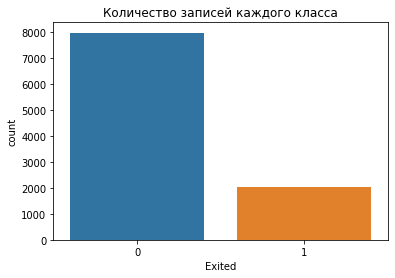

In [ ]:
# Определим количество записей каждого класса
display(final_data['Exited'].value_counts(normalize = True))
sns.countplot(final_data['Exited'])
plt.title('Количество записей каждого класса')
plt.show()

In [ ]:
#разделим датафрейм на признаки и целевой признак
features = final_data.drop('Exited', axis=1)
target = final_data['Exited']

In [ ]:
features.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
# так как отдельной тестовой выборки у нас нет, разделим выборку на обучающую, валидационную и тестовую
features_train, features_validtest, target_train, target_validtest = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345, 
                                                    stratify=target, # сохраним баланс классов
                                                    shuffle = True) # перемешаем данные
features_valid, features_test, target_valid, target_test = train_test_split(features_validtest,
                                                    target_validtest,
                                                    train_size=0.5,
                                                    random_state=12345, 
                                                    stratify=target_validtest,
                                                    shuffle = True)
# проверим правильность разбиения на выборки
print(features_train.shape, target_train.shape, features_valid.shape
      , target_valid.shape, features_test.shape, target_test.shape)

(6000, 10) (6000,) (2000, 10) (2000,) (2000, 10) (2000,)


In [ ]:
# Линейные и метрические модели достаточно чувствительны к выбросам,
# поэтому количественные признаки лучше стандартизировать.
# Для масштабирования и кодирования зафиксируем количественные признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
# Стандартизация количественных признаков
features_train_num = features_train[numeric]
scaler = StandardScaler()
scaler.fit(features_train_num)
features_train_num = pd.DataFrame(scaler.transform(features_train_num), columns = features_train_num.columns) 


features_valid_num = features_train[numeric]
scaler = StandardScaler()
scaler.fit(features_valid_num)
features_valid_num = pd.DataFrame(scaler.transform(features_valid_num), columns = features_valid_num.columns)
                                  # преобразование нужно, потому что transform выдаёт numppy массив, а не df

In [ ]:
categorical = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [ ]:
for name in categorical:
    features_train[name] = features_train[name].astype('category')

In [ ]:
# Порядковое кодирование категориальных признаков для деревянных моделей.
# Модели, построенные на основе решающих деревьев, не чувствительны к выбросам, поэтому стандартизацию количественных признаков делать не нужно
features_train_cat = features_train.copy()
ord_enc = OrdinalEncoder()
features_train_cat[categorical] = ord_enc.fit_transform(features_train_cat[categorical])
features_train_cat.head()

features_valid_cat = features_valid.copy()
ord_enc = OrdinalEncoder()
features_valid_cat[categorical] = ord_enc.fit_transform(features_valid_cat[categorical])
features_valid_cat.head()

features_test_cat = features_test.copy()
ord_enc = OrdinalEncoder()
features_test_cat[categorical] = ord_enc.fit_transform(features_test_cat[categorical])
features_test_cat.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
657,601,1.0,0.0,54,1.0,131039.97,2,1.0,1.0,199661.50
2083,534,0.0,1.0,24,1.0,0.00,1,1.0,1.0,169653.32
3234,527,0.0,1.0,47,1.0,0.00,1,1.0,0.0,21312.16
1551,730,2.0,0.0,52,7.0,0.00,2,0.0,1.0,122398.84
2344,714,1.0,0.0,49,4.0,93059.34,1,1.0,0.0,7571.51


In [ ]:
# Кодирование категориальных признаков методом OHE
ohe_enc = OneHotEncoder(drop = 'first')
ohe_enc.fit(features[categorical])
ohe_features = ohe_enc.get_feature_names(categorical)
features_train_ohe = pd.DataFrame(ohe_enc.transform(features_train[categorical]).toarray(), columns = ohe_features)

features_valid_ohe = pd.DataFrame(ohe_enc.transform(features_valid[categorical]).toarray(), columns = ohe_features)

features_test_ohe = pd.DataFrame(ohe_enc.transform(features_test[categorical]).toarray(), columns = ohe_features)

In [ ]:
features_train_ohe = features_train_ohe.join(features_train_num.reset_index())

features_valid_ohe = features_valid_ohe.join(features_valid_num.reset_index())

features_test_ohe = features_test_ohe.join(features_valid_num.reset_index())

In [ ]:
features_train_ohe.columns

Index(['Geography_Germany', 'Geography_Spain', 'Gender_Male', 'HasCrCard_1',
       'IsActiveMember_1', 'index', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary'],
      dtype='object')

In [ ]:
features_train_ohe = features_train_ohe.drop(['index'], axis = 1)

features_valid_ohe = features_valid_ohe.drop(['index'], axis = 1)

features_test_ohe = features_test_ohe.drop(['index'], axis = 1)

In [ ]:
features_train_ohe.head()

,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,1.0,0.0,0.0,0.0,1.0,-1.040434,0.953312,0.360600,0.774657,-0.914708,-0.119110
1,0.0,0.0,0.0,1.0,1.0,0.454006,-0.095244,-0.002786,1.910540,-0.914708,-0.258658
2,0.0,0.0,1.0,0.0,1.0,0.103585,-0.476537,1.087371,0.481608,0.820981,1.422836
3,1.0,0.0,0.0,1.0,1.0,-0.184996,0.190726,-0.002786,0.088439,-0.914708,-1.160427
4,0.0,0.0,0.0,1.0,0.0,-0.720933,1.620574,-1.456328,0.879129,-0.914708,0.113236


**Decision Tree**

In [ ]:
DT_best_depth = 0
DT_best_f1 = 0
for depth in range(1, 12, 1):
    DT_model =  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=depth,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,  random_state=12345,
            splitter='best')
    DT_model.fit(features_train_cat, target_train)
    predictions_valid = DT_model.predict(features_valid_cat)
    DT_f1_current = f1_score(target_valid, predictions_valid)
    if DT_f1_current > DT_best_f1:
        DT_best_f1 = DT_f1_current
        DT_best_depth = depth
print("best_depth =", DT_best_depth)
print("best_f1 =", DT_best_f1)

best_depth = 8
best_f1 = 0.5873925501432665


**Random Forest**

In [ ]:
best_f1 = 0
best_depth = 0
best_est = 0
for est in range(10, 100, 10):
    for depth in range(1, 12):
        RF_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        RF_model.fit(features_train_cat, target_train)
        predictions_valid = RF_model.predict(features_valid_cat)
        f1_current = f1_score(target_valid, predictions_valid)
        if f1_current > best_f1:
            best_f1 = f1_current
            best_depth = depth
            best_est = est
print("best_depth =", best_depth)
print("best_est =", best_est)
print("best_f1 =", best_f1)

best_depth = 10
best_est = 40
best_f1 = 0.5864197530864197


**Logistic Regression**

In [ ]:
lr_model = LogisticRegression(solver = 'lbfgs', max_iter = 3000)
lr_model.fit(features_train_ohe, target_train)
predictions_valid = lr_model.predict(features_valid_ohe)
print("f1 = ", f1_score(target_valid, predictions_valid))

f1 =  0.18411552346570398


In [ ]:
#Создаем константную модель
dummy_model = DummyClassifier(strategy="most_frequent", random_state = 12345)
ROC_AUC = cross_val_score(dummy_model, features_train, target_train, scoring = 'roc_auc', n_jobs = -1) 

print('ROC-AUC на валидационной выборке константной модели: ', ROC_AUC.mean())

ROC-AUC на валидационной выборке константной модели:  0.5


In [ ]:
#матрица ошибок для дерева решений
DTC_prediction = DT_model.predict(features_valid_cat)
display(confusion_matrix(target_valid, DTC_prediction))

#матрица ошибок для случайного леса
RFC_prediction = RF_model.predict(features_valid_cat)
display(confusion_matrix(target_valid, RFC_prediction))

#матрица ошибок для логистической регрессии
LgR_prediction = lr_model.predict(features_valid_ohe)
display(confusion_matrix(target_valid, LgR_prediction))

array([[1470,  122],
       [ 204,  204]])

array([[1544,   48],
       [ 224,  184]])

array([[1497,   95],
       [ 357,   51]])

Исходя из данных матрицы, дерево решений склонно выдавать позитивные предсказания, при высокой доле ложно-позитивных предсказаний.

Предсказания случайного леса более точны, однако модель также имеет склонность к ложно-положительным предсказаниям.

In [ ]:
#полнота, точность, AUC-ROC и F1-мера для дерева решений
DT_model =  DecisionTreeClassifier(max_depth=8, random_state=12345)
DT_model.fit(features_train_cat, target_train)
probabilities = DT_model.predict_proba(features_valid_cat)
probabilities_one = probabilities[:, 1]
model_pred = DT_model.predict(features_valid_cat)
print('Площадь ROC-кривой:', roc_auc_score(target_valid, probabilities_one))
print("Полнота" , recall_score(target_valid, model_pred))
print("Точность", precision_score(target_valid, model_pred))
print("F1-мера", f1_score(target_valid, model_pred))

Площадь ROC-кривой: 0.805046217607646
Полнота 0.5024509803921569
Точность 0.7068965517241379
F1-мера 0.5873925501432665


In [ ]:
#полнота, точность, AUC-ROC и F1-мера для случайного леса
#rec_prec_f1(target_valid, RFC_prediction)
RF_model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=10)
RF_model.fit(features_train_cat, target_train)
probabilities = RF_model.predict_proba(features_valid_cat)
probabilities_one = probabilities[:, 1]
model_pred = RF_model.predict(features_valid_cat)
print('Площадь ROC-кривой:', roc_auc_score(target_valid, probabilities_one))
print("Полнота" , recall_score(target_valid, model_pred))
print("Точность", precision_score(target_valid, model_pred))
print("F1-мера", f1_score(target_valid, model_pred))

Площадь ROC-кривой: 0.8663122598285544
Полнота 0.46568627450980393
Точность 0.7916666666666666
F1-мера 0.5864197530864197


In [ ]:
#полнота, точность, AUC-ROC и F1-мера для логистической регрессии
#rec_prec_f1(target_valid, RFC_prediction)
lr_model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
lr_model.fit(features_train_ohe, target_train)
probabilities = lr_model.predict_proba(features_valid_ohe)
probabilities_one = probabilities[:, 1]
model_pred = lr_model.predict(features_valid_ohe)
print('Площадь ROC-кривой:', roc_auc_score(target_valid, probabilities_one))
print("Полнота" , recall_score(target_valid, model_pred))
print("Точность", precision_score(target_valid, model_pred))
print("F1-мера", f1_score(target_valid, model_pred))

Площадь ROC-кривой: 0.6224874371859297
Полнота 0.125
Точность 0.3493150684931507
F1-мера 0.18411552346570398


Метрики оказались низкими для всех моделей, что говорит об их низком качестве. Лучший результат показала модель дерева решений. Незначительно хуже показал результат случайный лес.

**Вывод:** Датасет не является сбалансированным, количество объектов класса 0 значительно превышает (в 4 раза) количество объектов класса 1. Это, как правило, не приводит к высокой обощающей способности алгоритмов. Метрика accuracy будет некорректно отражать качество классификации. В таких случаях лучше использовать либо f-меру, либо меру Жаккарда. Для бинарной классификации оценку качества обощающей способности алгоритма также эффективно оценивать по метрике ROC-AUC. Метрика ROC-AUC не чувствительна к дисбалансу, но другие метрики чувствительны

Для устранения дисбаланса при инициации моделей будем использовать метод взвешивания классов, т.е. параметр class_weight='balanced'.

## Борьба с дисбалансом

### Балансировка выбоброк

Как было установлено в ходе исследовательского анализа, классы в выборке несбалансированы: объектов класса 0 в выборке в 4 раза больше, чем объектов класса 1.

Поэтому сбалансируем классы путём умножения объектов класса 1, после чего обучим модели на сбалансированной выборке.

In [ ]:
#создадим функцию для увеличения представленной класса в выборке 
def upsample(features, target, repeat, upsampled_сlass):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    else:
        features_upsampled = 0
        target_upsampled = 0 
    return features_upsampled, target_upsampled
    "Функция принимаем значение признаков (features[]), целевого признака (target[]), repeat(int / float), "
    " класс который будет увеличен (upsampled_сlass (0 or 1))"

In [ ]:
#применим функцию upsample 
#увеличим количество положительных ответов в 4 раза
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 1)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

1    0.50569
0    0.49431
Name: Exited, dtype: float64
(9666,)


In [ ]:
# Порядковое кодирование категориальных признаков для деревянных моделей.
# Модели, построенные на основе решающих деревьев, не чувствительны к выбросам, поэтому стандартизацию количественных признаков делать не нужно
features_train_cat_up = features_train_upsampled.copy()
ord_enc = OrdinalEncoder()
features_train_cat_up[categorical] = ord_enc.fit_transform(features_train_cat_up[categorical])
features_train_cat_up.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6785,621,2.0,1.0,41,5.0,104631.67,1,1.0,1.0,95551.22
8042,606,0.0,1.0,37,6.0,82373.94,1,0.0,0.0,172526.90
2962,550,0.0,1.0,38,9.0,140278.99,3,1.0,1.0,171457.06
2492,520,1.0,0.0,31,3.0,108914.17,1,1.0,1.0,183572.39
2414,556,0.0,0.0,52,9.0,0.00,1,1.0,0.0,175149.20


In [ ]:
# Кодирование категориальных признаков методом OHE
ohe_enc = OneHotEncoder(drop = 'first')
ohe_enc.fit(features_train_upsampled[categorical])
ohe_features = ohe_enc.get_feature_names(categorical)
features_train_ohe_up = pd.DataFrame(ohe_enc.transform(features_train_upsampled[categorical]).toarray(), columns = ohe_features)

# Стандартизация количественных признаков
features_train_num_up = features_train_upsampled[numeric]
scaler = StandardScaler()
scaler.fit(features_train_num_up)
features_train_num_up = pd.DataFrame(scaler.transform(features_train_num_up), columns = features_train_num_up.columns) 

In [ ]:
features_train_ohe_up = features_train_ohe_up.join(features_train_num_up.reset_index())
features_train_ohe_up = features_train_ohe_up.drop(['index'], axis = 1)

Классы сбалансированы, можно проводить обучение моделей на новых данных.

### Обучение на новых данных

**Decision Tree**

In [ ]:
DT_best_depth = 0
DT_best_f1 = 0
for depth in range(1, 12, 1):
    DT_model =  DecisionTreeClassifier(class_weight = 'balanced', criterion='gini', max_depth=depth,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,  random_state=12345,
            splitter='best')
    DT_model.fit(features_train_cat_up, target_train_upsampled)
    predictions_valid = DT_model.predict(features_valid_cat)
    DT_f1_current = f1_score(target_valid, predictions_valid)
    if DT_f1_current > DT_best_f1:
        DT_best_f1 = DT_f1_current
        DT_best_depth = depth
print("best_depth =", DT_best_depth)
print("best_f1 =", DT_best_f1)

best_depth = 7
best_f1 = 0.5841209829867676


In [ ]:
#полнота, точность, AUC-ROC и F1-мера для дерева решений
DT_model =  DecisionTreeClassifier(max_depth=7, random_state=12345, class_weight = 'balanced')
DT_model.fit(features_train_cat, target_train)
probabilities = DT_model.predict_proba(features_valid_cat)
probabilities_one = probabilities[:, 1]
model_pred = DT_model.predict(features_valid_cat)
print('Площадь ROC-кривой:', roc_auc_score(target_valid, probabilities_one))
print("Полнота" , recall_score(target_valid, model_pred))
print("Точность", precision_score(target_valid, model_pred))
print("F1-мера", f1_score(target_valid, model_pred))

Площадь ROC-кривой: 0.8201262131737117
Полнота 0.7622549019607843
Точность 0.47772657450076805
F1-мера 0.5873465533522191


**Random Forest**

In [ ]:
best_f1 = 0
best_depth = 0
best_est = 0
for est in range(10, 100, 10):
    for depth in range(1, 12):
        RF_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight = 'balanced')
        RF_model.fit(features_train_cat_up, target_train_upsampled)
        predictions_valid = RF_model.predict(features_valid_cat)
        f1_current = f1_score(target_valid, predictions_valid)
        if f1_current > best_f1:
            best_f1 = f1_current
            best_depth = depth
            best_est = est
print("best_depth =", best_depth)
print("best_est =", best_est)
print("best_f1 =", best_f1)

best_depth = 10
best_est = 90
best_f1 = 0.6461538461538462


In [ ]:
#полнота, точность, AUC-ROC и F1-мера для случайного леса
#rec_prec_f1(target_valid, RFC_prediction)
RF_model = RandomForestClassifier(random_state=12345, n_estimators=90, max_depth=10, class_weight = 'balanced')
RF_model.fit(features_train_cat, target_train)
probabilities = RF_model.predict_proba(features_valid_cat)
probabilities_one = probabilities[:, 1]
model_pred = RF_model.predict(features_valid_cat)
print('Площадь ROC-кривой:', roc_auc_score(target_valid, probabilities_one))
print("Полнота" , recall_score(target_valid, model_pred))
print("Точность", precision_score(target_valid, model_pred))
print("F1-мера", f1_score(target_valid, model_pred))

Площадь ROC-кривой: 0.8672590895654746
Полнота 0.6397058823529411
Точность 0.6199524940617577
F1-мера 0.6296743063932447


**Logistic Regression**

In [ ]:
lr_model = LogisticRegression(solver = 'lbfgs', max_iter = 1000, class_weight = 'balanced')
lr_model.fit(features_train_ohe, target_train)
probabilities = lr_model.predict_proba(features_valid_ohe)
probabilities_one = probabilities[:, 1]
model_pred = lr_model.predict(features_valid_ohe)
print('Площадь ROC-кривой:', roc_auc_score(target_valid, probabilities_one))
print("Полнота" , recall_score(target_valid, model_pred))
print("Точность", precision_score(target_valid, model_pred))
print("F1-мера", f1_score(target_valid, model_pred))

Площадь ROC-кривой: 0.6172129027490393
Полнота 0.5147058823529411
Точность 0.2845528455284553
F1-мера 0.36649214659685864


На валидационной выборке лучшее значение F-1 меры показал случайный лес спараметрами 'max_depth': 10, 'n_estimators': 90.

## Тестирование модели

In [ ]:
probabilities = RF_model.predict_proba(features_test_cat)
probabilities_one = probabilities[:, 1]
model_pred = RF_model.predict(features_test_cat)
print('Площадь ROC-кривой:', roc_auc_score(target_test, probabilities_one))
print("Полнота" , recall_score(target_test, model_pred))
print("Точность", precision_score(target_test, model_pred))
print("F1-мера", f1_score(target_test, model_pred))

Площадь ROC-кривой: 0.8493902222715782
Полнота 0.5872235872235873
Точность 0.5960099750623441
F1-мера 0.5915841584158416


In [ ]:
dummy_model = DummyClassifier(strategy="most_frequent", random_state = 12345)
ROC_AUC = cross_val_score(dummy_model, features_train, target_train, n_jobs = -1) 

print('ROC-AUC на валидационной выборке константной модели: ', ROC_AUC.mean())

ROC-AUC на валидационной выборке константной модели:  0.7963333333333333


**Вывод:**
1. В первоначальной выборке наблюдался дисбаланс классов (примерно 4:1). Дисбаланс классов был утранён путём увеличения записей класса 1. Модели, обученные на данных с дисбалансом, показывали низкую точность предсказаний.
2. На данных, в которых дисбаланс был устранён, модели показали более высокие показатели. Лучшей оказалась модель случайного леса, которая и была взята в качестве финальной.
3. Для улучшения модели были проставлены параметры class_weight и bootstrap, было подобрано значение max_depth.
4. Обученная модель показале следующие результаты на валидационной выборке:
    Площадь ROC-кривой: 0.8672590895654746
    Полнота 0.6397058823529411
    Точность 0.6199524940617577
    F1-мера 0.6296743063932447
5. На тестовой выборке финальная модель показала высокое значение f1-меры (f1 > 0.59)
6. Модель адекватна, так как её метрики лучше метрики консантной модели.